In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('listings_details.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
id                                  20030 non-null int64
listing_url                         20030 non-null object
scrape_id                           20030 non-null int64
last_scraped                        20030 non-null object
name                                19992 non-null object
summary                             19510 non-null object
space                               14579 non-null object
description                         19906 non-null object
experiences_offered                 20030 non-null object
neighborhood_overview               13257 non-null object
notes                               9031 non-null object
transit                             13635 non-null object
access                              12227 non-null object
interaction                         11974 non-null object
house_rules                         12571 non-null object
thumbnail_url           

In [5]:
df.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  2.003000e+04  2.003000e+04            0.0         0.0             0.0   
mean   1.541725e+07  2.018121e+13            NaN         NaN             NaN   
std    8.569404e+06  3.906348e+00            NaN         NaN             NaN   
min    2.818000e+03  2.018121e+13            NaN         NaN             NaN   
25%    8.188423e+06  2.018121e+13            NaN         NaN             NaN   
50%    1.563049e+07  2.018121e+13            NaN         NaN             NaN   
75%    2.202577e+07  2.018121e+13            NaN         NaN             NaN   
max    3.058041e+07  2.018121e+13            NaN         NaN             NaN   

            host_id  host_acceptance_rate  host_listings_count  \
count  2.003000e+04                   0.0         20026.000000   
mean   4.868570e+07                   NaN             6.105812   
std    5.649635e+07                   NaN            30.388516   
min    3.159000e+03                   NaN             0.000000   
25%    8.093516e+06                   NaN             1.000000   
50%    2.369450e+07                   NaN             1.000000   
75%    6.827535e+07                   NaN             1.000000   
max    2.293612e+08                   NaN           698.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               20026.000000                           0.0  20030.000000   
mean                    6.105812                           NaN     52.365212   
std                    30.388516                           NaN      0.015996   
min                     0.000000                           NaN     52.288378   
25%                     1.000000                           NaN     52.355126   
50%                     1.000000                           NaN     52.364590   
75%                     1.000000                           NaN     52.375074   
max                   698.000000                           NaN     52.424713   

          longitude  accommodates     bathrooms     bedrooms          beds  \
count  20030.000000  20030.000000  20020.000000  20022.00000  20023.000000   
mean       4.888977      2.891912      1.137662      1.44506      1.849223   
std        0.035573      1.318760      0.793903      0.88568      1.389664   
min        4.753247      1.000000      0.000000      0.00000      0.000000   
25%        4.863595      2.000000      1.000000      1.00000      1.000000   
50%        4.886387      2.000000      1.000000      1.00000      1.000000   
75%        4.908288      4.000000      1.000000      2.00000      2.000000   
max        5.027689     17.000000    100.500000     12.00000     32.000000   

       square_feet  guests_included  minimum_nights  maximum_nights  \
count   406.000000     20030.000000    20030.000000    20030.000000   
mean    520.485222         1.468997        3.328707      631.225711   
std     544.557660         0.937890       12.537419      541.339981   
min       0.000000         1.000000        1.000000        1.000000   
25%       0.000000         1.000000        2.000000       21.000000   
50%     484.000000         1.000000        2.000000     1125.000000   
75%     807.000000         2.000000        3.000000     1125.000000   
max    4306.000000        16.000000     1001.000000     9999.000000   

       availability_30  availability_60  availability_90  availability_365  \
count     20030.000000     20030.000000     20030.000000      20030.000000   
mean          4.905642        11.411233        18.168597         59.913679   
std           7.942903        17.498603        27.704834        104.027710   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         0.000000          3.000000   
75%           7.000000        18.000000        28.000000         67.000000   
max          

In [6]:
listdata = []
listfeat=list(df.columns)
for item in listfeat:
    list1=[]
    list1.append(item)
    list1.append(str(df[item].dtype))
    list1.append(df[item].isna().sum())
    list1.append(round((df[item].isna().sum()/len(df))*100,2))
    list1.append(df[item].nunique())
    list1.append(list(df[item].value_counts().head(2).index))
    listdata.append(list1)

df_desc=pd.DataFrame(listdata,columns='dataFeatures dataType null nullPct unique uniqueSample'.split(' '))
df_desc

dataFeatures dataType   null  nullPct  unique  \
0                                 id    int64      0     0.00   20030   
1                        listing_url   object      0     0.00   20030   
2                          scrape_id    int64      0     0.00       1   
3                       last_scraped   object      0     0.00       2   
4                               name   object     38     0.19   19503   
5                            summary   object    520     2.60   19003   
6                              space   object   5451    27.21   14227   
7                        description   object    124     0.62   19648   
8                experiences_offered   object      0     0.00       1   
9              neighborhood_overview   object   6773    33.81   12029   
10                             notes   object  10999    54.91    7270   
11                           transit   object   6395    31.93   12944   
12                            access   object   7803    38.96    9615   
13                       interaction   object   8056    40.22    9634   
14                       house_rules   object   7459    37.24   10681   
15                     thumbnail_url  float64  20030   100.00       0   
16                        medium_url  float64  20030   100.00       0   
17                       picture_url   object      0     0.00   19937   
18                    xl_picture_url  float64  20030   100.00       0   
19                           host_id    int64      0     0.00   17264   
20                          host_url   object      0     0.00   17264   
21                         host_name   object      4     0.02    5915   
22                        host_since   object      4     0.02    2829   
23                     host_location   object     39     0.19     550   
24                        host_about   object   8227    41.07    9467   
25                host_response_time   object   9483    47.34       4   
26                host_response_rate   object   9483    47.34      58   
27              host_acceptance_rate  float64  20030   100.00       0   
28                 host_is_superhost   object      4     0.02       2   
29                host_thumbnail_url   object      4     0.02   17240   
30                  host_picture_url   object      4     0.02   17240   
31                host_neighbourhood   object   5808    29.00      87   
32               host_listings_count  float64      4     0.02      43   
33         host_total_listings_count  float64      4     0.02      43   
34                host_verifications   object      0     0.00     354   
35              host_has_profile_pic   object      4     0.02       2   
36            host_identity_verified   object      4     0.02       2   
37                            street   object      0     0.00     103   
38                     neighbourhood   object   1653     8.25      44   
39            neighbourhood_cleansed   object      0     0.00      22   
40      neighbourhood_group_cleansed  float64  20030   100.00       0   
41                              city   object      4     0.02      30   
42                             state   object    127     0.63      55   
43                           zipcode   object    866     4.32    6870   
44                            market   object     42     0.21       4   
45                    smart_location   object      0     0.00      31   
46                      country_code   object      0     0.00       1   
47                           country   object      0     0.00       1   
48                          latitude  float64      0     0.00   20030   
49                         longitude  float64      0     0.00   20030   
50                 is_location_exact   object      0     0.00       2   
51                     property_type   object      0     0.00      31   
52                         room_type   object      0     0.00       3   
53                      accommodates    int64      0     0.00      15   
54       

In [7]:
df_desc[df_desc['unique']>500]

dataFeatures dataType   null  nullPct  unique  \
0                      id    int64      0     0.00   20030   
1             listing_url   object      0     0.00   20030   
4                    name   object     38     0.19   19503   
5                 summary   object    520     2.60   19003   
6                   space   object   5451    27.21   14227   
7             description   object    124     0.62   19648   
9   neighborhood_overview   object   6773    33.81   12029   
10                  notes   object  10999    54.91    7270   
11                transit   object   6395    31.93   12944   
12                 access   object   7803    38.96    9615   
13            interaction   object   8056    40.22    9634   
14            house_rules   object   7459    37.24   10681   
17            picture_url   object      0     0.00   19937   
19                host_id    int64      0     0.00   17264   
20               host_url   object      0     0.00   17264   
21              host_name   object      4     0.02    5915   
22             host_since   object      4     0.02    2829   
23          host_location   object     39     0.19     550   
24             host_about   object   8227    41.07    9467   
29     host_thumbnail_url   object      4     0.02   17240   
30       host_picture_url   object      4     0.02   17240   
43                zipcode   object    866     4.32    6870   
48               latitude  float64      0     0.00   20030   
49              longitude  float64      0     0.00   20030   
58              amenities   object      0     0.00   19034   
77           first_review   object   2406    12.01    2079   
78            last_review   object   2406    12.01    1202   
95      reviews_per_month  float64   2406    12.01     754   

                                         uniqueSample  
0                                [19075070, 21005013]  
1   [https://www.airbnb.com/rooms/9834151, https:/...  
4                  [Amsterdam, Amsterdam Appartement]  
5   [**brand new** Sleeping up to 2 guests in luxu...  
6   [This gorgeous apartment is excellently design...  
7   [Hotel Jansen is a new Short Stay hotel in Ams...  
9   [Oud West is close to the city-centre and clos...  
10  [Freshly made up beds and crispy towels (one p...  
11  [You have not experienced the Dutch culture tr...  
12  [Guests are invited to enjoy the whole apartme...  
13  [Iamb&b will let you in, hand you the keys and...  
14  [GENERAL HOUSE RULES Thanks for booking our pl...  
17  [https://a0.muscache.com/im/pictures/cb39c8f2-...  
19                                [65859990, 1464510]  
20  [https://www.airbnb.com/users/show/65859990, h...  
21                        [Martijn, Michiel And Jane]  
22                           [2016-04-05, 2011-12-02]  
23  [Amsterdam, North Holland, Netherlands, Amster...  
24  [Hi, I'm Martijn, \r\n\r\nWe are a team of pro...  
29  [https://a0.muscache.com/im/pictures/user/5832...  
30  [https://a0.muscache.com/im/pictures/user/5832...  
43                                       [1054, 1055]  
48             [52.36849906096132, 52.36515095638898]  
49             [4.872006988802463, 4.872997700497941]  
58  [{"translation missing: en.hosting_amenity_49"...  
77                           [2016-03-30, 2017-04-17]  
78                           [2018-12-02, 2018-11-18]  
95                                       [0.03, 0.07]

## 2. DATA CLEANING

In [8]:
df_clean = df.copy()

#remove dollar and make categorical

def removedollar(price):
    if ',' in str(price) :
        str_price = str(price).replace(",", "")
        return str_price.split('.')[0][1:]
    else :
        return str(price).split('.')[0][1:]
    
def catagoryfee(x):
    if x== 0 :
        return 0
    else :
        return 1

df_clean['price'] = pd.to_numeric(df['price'].apply(removedollar))
df["security_deposit"].fillna("$0.00", inplace=True)
df["security_deposit"] = pd.to_numeric(df["security_deposit"].apply(removedollar))
df_clean['security_deposit']=df['security_deposit'].apply(catagoryfee)
df["cleaning_fee"].fillna("$0.00", inplace=True)    
df["cleaning_fee"] = pd.to_numeric(df["cleaning_fee"].apply(removedollar))
df_clean['cleaning_fee']=df['cleaning_fee'].apply(catagoryfee)
df_clean['extra_people'] = pd.to_numeric(df['extra_people'].apply(removedollar))

list_uniq_2= []
for item in df_clean.columns:
    if df_clean[item].nunique() == 2 and str(df_clean[item].dtype) == 'object' :
        list_uniq_2.append(item)
list_uniq_2
def catcolom(x):
    if x =='t':
        return 1
    else :
        return 0
for item in list_uniq_2:
    df_clean[item]=df_clean[item].apply(catcolom)

In [9]:
# drop colom

kolom_to_drop = list(df_desc[(df_desc['unique']>500) | (df_desc['unique'] == 1)| (df_desc['unique'] == 0) | (df_desc['nullPct'] > 40)]['dataFeatures'])
for item in ['id','name','latitude','longitude','amenities','reviews_per_month']:
    kolom_to_drop.remove(item)
df_clean = df_clean.drop(kolom_to_drop, axis=1)

col_host = []
for item in df_clean.columns:
    if 'host' in item:
        col_host.append(item)
    elif 'scraped' in item:
        col_host.append(item)
df_clean[col_host]

# drop beberapa colom dari colom tersebut

for item in ['host_is_superhost','host_total_listings_count','host_identity_verified']:
    col_host.remove(item)
df_clean=df_clean.drop(col_host,axis=1)

In [10]:
# memilih lokasi
df[['street','neighbourhood','neighbourhood_cleansed','city','state','market','smart_location','latitude','longitude']]

# karena beberapa kolomn memiliki value sama maka akan diambil beberapa.

kolom_to_drop = ['street','neighbourhood','city','state','smart_location']
df_clean=df_clean.drop(kolom_to_drop,axis=1)

import plotly.express as px

fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", color='neighbourhood_cleansed', zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
rating_col = []
for item in df_clean.columns:
    if 'review' in item:
        rating_col.append(item)
rating_col[1:-1]

def fillreview(df):
    if df.number_of_reviews==0:
        return 0
    elif pd.isna(df[c]) : 
        return df_clean.groupby(['property_type','room_type']).mean()[c].loc[df['property_type'],df['room_type']]
    else :
        return df[c]
for item in rating_col[1:]:
    c=item
    df_clean[c]=df_clean.apply(fillreview,axis=1)
    
    
def fillbed(df):
    if pd.isna(df['beds']) :
        return np.floor(df_clean.groupby(['property_type','room_type','accommodates']).mean()['beds'].loc[df['property_type'],df['room_type'],df['accommodates']])
    else :
        return df['beds']
    
def fillbedroom(df):
    if pd.isna(df['bedrooms']) :
        return np.floor(df_clean.groupby(['property_type','room_type','accommodates']).mean()['bedrooms'].loc[df['property_type'],df['room_type'],df['accommodates']])
    else :
        return df['bedrooms']

def fillbathroom(df):
    if pd.isna(df['bathrooms']) :
        if np.floor(df_clean.groupby(['property_type','room_type']).mean()['bathrooms']
                    .loc[df['property_type'],df['room_type']]) == 0 :
            return 1
        else :
            return np.floor(df_clean.groupby(['property_type','room_type']).mean()['bathrooms'].loc[df['property_type'],df['room_type']])
    else :
        if df['bathrooms'] % 1 != 0 :
            return np.ceil(df['bathrooms'])
        else :
            return df['bathrooms']
def cancelpolicy(df):
    if 'strict' in df['cancellation_policy']:
        return 'strict'
    else :
        return df['cancellation_policy']

df_clean['beds']=df_clean.apply(fillbed,axis=1)
df_clean=df_clean[(df_clean['beds']>0 ) & (df_clean['beds']<9)]
df_clean['bedrooms']=df_clean.apply(fillbedroom,axis=1)
df_clean=df_clean[(df_clean['bedrooms']<6 )]
df_clean['bathrooms']=df_clean.apply(fillbathroom,axis=1)
df_clean=df_clean[(df_clean['bathrooms']<5 )]
df_clean=df_clean[df_clean['accommodates']<9]
df_clean['cancellation_policy']=df_clean.apply(cancelpolicy,axis=1)

In [12]:
df['property_type'].value_counts()

Apartment                 15582
House                      1523
Townhouse                   649
Bed and breakfast           455
Loft                        384
Boat                        372
Condominium                 323
Houseboat                   225
Guest suite                 152
Aparthotel                   73
Serviced apartment           63
Other                        51
Guesthouse                   43
Villa                        32
Boutique hotel               28
Cabin                        14
Bungalow                     12
Cottage                      12
Hotel                         7
Casa particular (Cuba)        5
Tiny house                    5
Hostel                        4
Barn                          4
Chalet                        3
Campsite                      2
Camper/RV                     2
Earth house                   1
Nature lodge                  1
Lighthouse                    1
Tent                          1
Castle                        1
Name: pr

In [13]:
list_other = []
list_index_to_drop = []
for item in df_clean['property_type'].value_counts()[df_clean['property_type'].value_counts()<100].index:
    list_other.append(item)

def other(df):
    if df['property_type'] in list_other:
        return 'Other'
    else :
        return df['property_type']
df_clean['property_type']=df_clean.apply(other,axis=1)
df_clean.dropna(inplace=True)

### DROP OUTLIER

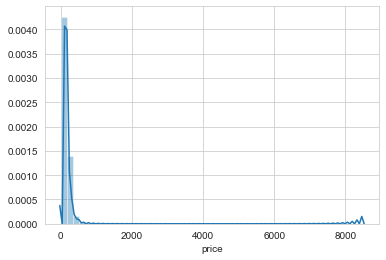

In [14]:
sns.distplot(df_clean['price'])

In [15]:
def check_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)].index ,upper_limit,lower_limit
id_to_drop,upper,lower = check_outlier(df_clean,'price')
df_clean=df_clean.drop(id_to_drop)

## Fill Mising value

In [16]:
listdata = []
listfeat=list(df_clean.columns)
for item in listfeat:
    list1=[]
    list1.append(item)
    list1.append(str(df_clean[item].dtype))
    list1.append(df_clean[item].isna().sum())
    list1.append(round((df_clean[item].isna().sum()/len(df_clean))*100,2))
    list1.append(df_clean[item].nunique())
    list1.append(list(df_clean[item].value_counts().head(2).index))
    listdata.append(list1)

df_desc_clean=pd.DataFrame(listdata,columns='dataFeatures dataType null nullPct unique uniqueSample'.split(' '))
df_desc_clean

dataFeatures dataType  null  nullPct  unique  \
0                                 id    int64     0      0.0   18648   
1                               name   object     0      0.0   18193   
2                  host_is_superhost    int64     0      0.0       2   
3          host_total_listings_count  float64     0      0.0      41   
4             host_identity_verified    int64     0      0.0       2   
5             neighbourhood_cleansed   object     0      0.0      22   
6                             market   object     0      0.0       4   
7                           latitude  float64     0      0.0   18648   
8                          longitude  float64     0      0.0   18648   
9                  is_location_exact    int64     0      0.0       2   
10                     property_type   object     0      0.0      10   
11                         room_type   object     0      0.0       3   
12                      accommodates    int64     0      0.0       8   
13                         bathrooms  float64     0      0.0       5   
14                          bedrooms  float64     0      0.0       6   
15                              beds  float64     0      0.0       8   
16                          bed_type   object     0      0.0       5   
17                         amenities   object     0      0.0   17739   
18                             price    int64     0      0.0     267   
19                  security_deposit    int64     0      0.0       2   
20                      cleaning_fee    int64     0      0.0       2   
21                   guests_included    int64     0      0.0      12   
22                      extra_people    int64     0      0.0      97   
23                    minimum_nights    int64     0      0.0      47   
24                    maximum_nights    int64     0      0.0     137   
25                  calendar_updated   object     0      0.0      68   
26                   availability_30    int64     0      0.0      31   
27                   availability_60    int64     0      0.0      61   
28                   availability_90    int64     0      0.0      91   
29                  availability_365    int64     0      0.0     366   
30                 number_of_reviews    int64     0      0.0     354   
31              review_scores_rating  float64     0      0.0      61   
32            review_scores_accuracy  float64     0      0.0      24   
33         review_scores_cleanliness  float64     0      0.0      25   
34             review_scores_checkin  float64     0      0.0      22   
35       review_scores_communication  float64     0      0.0      24   
36            review_scores_location  float64     0      0.0      23   
37               review_scores_value  float64     0      0.0      24   
38                  instant_bookable    int64     0      0.0       2   
39               cancellation_policy   object     0      0.0       3   
40     require_guest_profile_picture    int64     0      0.0       2   
41  require_guest_phone_verification    int64     0      0.0       2   
42                 reviews_per_month  float64     0      0.0     759   

                                         uniqueSample  
0                                [19075070, 21785272]  
1                  [Amsterdam, Amsterdam Appartement]  
2                                              [0, 1]  
3                                          [1.0, 2.0]  
4                                              [0, 1]  
5   [De Baarsjes - Oud-West, De Pijp - Rivierenbuurt]  
6                  [Amsterdam, Other (International)]  
7             [52.36849906096132, 52.383395812537756]  
8             [4.872006988802463, 4.8474991306145965]  
9                                              [1, 0]  
10                                 [Apartment, House]  
11                    [Entire home/apt, Private room]  
12                                             [2, 4]  
13                                         [1.0, 2.0]  
14             

In [17]:
list_corr= []
list_cat= []
for item in df_clean.columns:
    if (df_clean[item].nunique() != 2 ) and (str(df_clean[item].dtype) != 'object') :
        list_corr.append(item)
    else:
        list_cat.append(item)
df_clean[list_corr].corr().loc['price']

col_to_use = []
for item in df_clean[list_corr].corr().loc['price'].index:
    if (df_clean[list_corr].corr().loc['price'][item] > 0.05) or (df_clean[list_corr].corr().loc['price'][item] < -0.05):
        col_to_use.append(item)
for item in ['require_guest_profile_picture','calendar_updated','require_guest_phone_verification','market']:
    list_cat.remove(item)
for item in list_cat:
    col_to_use.append(item)
df_predict= df_clean[col_to_use]

In [18]:
import re
def clean_text(x):
    letter = re.sub("[^a-zA-Z1-9]","_",x)
    return ' '.join(letter.split()).lower()

def new_amenties(x):
    fasilitas = str(x)[1:-1].split(',')
    fas=[]
    for item in fasilitas:
        name = clean_text(item)
        if 'missing' not in name :
            fas.append(name)
    return ' '.join(fas)
df_predict['amenities']= df_predict['amenities'].apply(new_amenties)


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
df_amin=df_predict[['name','amenities']]
cv_amin =CountVectorizer()
cv_amin_res = cv_amin.fit_transform(df_amin['amenities'])
df_amin=pd.DataFrame(cv_amin_res.todense(),columns=cv_amin.get_feature_names(),index=df_predict.index)

fasilitas = {'new_Suitableforevents' : ['_suitable_for_events_','_bbq_grill_'],
             'new_Petsallowed' : ['_pets_live_on_this_property_','dog_s_','cat_s_','_other_pet_s__','_pets_allowed_'],
             'new_Smokingallowed' : ['_smoking_allowed_'],
             'new_Freeparkingonpremises': ['_free_street_parking_','_free_parking_on_premises_'],
             'new_Gym' : ['gym'] ,
             'new_Hottub' : ['_hot_tub_','bathtub'],
             'new_Pool' : ['pool'],
             'new_Kitchen' : ['kitchen','dishwasher','stove','oven','_cooking_basics_','_dishes_and_silverware_','refrigerator','microwave'],
             'new_coffee_maker' : ['_coffee_maker_','_hot_water_kettle_'],
             'new_wireless_intercom' : ['_buzzer_wireless_intercom_'],
             'new_Shampoo' : ['_handheld_shower_head_','essentials','shampoo'],
             'new_Heating' : ['heating'],
             'new_Washer':['washer','dryer','_washer___dryer_'],
             'new_internet' : ['_ethernet_connection_','wifi','_pocket_wifi_','internet'],
             'new_Breakfast' : ['breakfast'] ,
             'new_Indoorfireplace' : ['_fireplace_guards_','_indoor_fireplace_'],
             'new_Hangers':['hangers'],
             'new_Iron':['iron'],
             'new_Hairdryer':['_hair_dryer_'],
             'new_Laptopfriendlyworkspace':['_laptop_friendly_workspace_'],
             'new_TV': ['tv','_cable_tv_'],
             'new_baby_friendly' : ['_high_chair_','_changing_table_','crib','_pack__n_play_travel_crib_','_outlet_covers_','_babysitter_recommendations_','_stair_gates_','_baby_monitor_','_baby_bath_','_table_corner_guards_'],
             'new_family' : ['_game_console_','_family_kid_friendly_','_children_s_books_and_toys_','_children_s_dinnerware_'],
             'new_Selfcheckin' : ['_self_check_in_'],
             'new_Smokedetector':['_smoke_detector_'],
             'new_Carbonmonoxidedetector':['_carbon_monoxide_detector_']}
list_fast=[]
for key,value in fasilitas.items():
    list_fast.append(key)
    df_amin[key] = df_amin[value].sum(axis=1)
for item in list_fast:
    df_amin[item]=df_amin[item].apply(catagoryfee)
df_amin=df_amin[list_fast]

list_amin=pd.concat([df_predict['price'],df_amin],axis=1).corr()['price'].sort_values() 
list_amin=(list_amin[(list_amin>0.1) | (list_amin<-0.1) ])[:-1].index
df_amin=df_amin[list_amin]

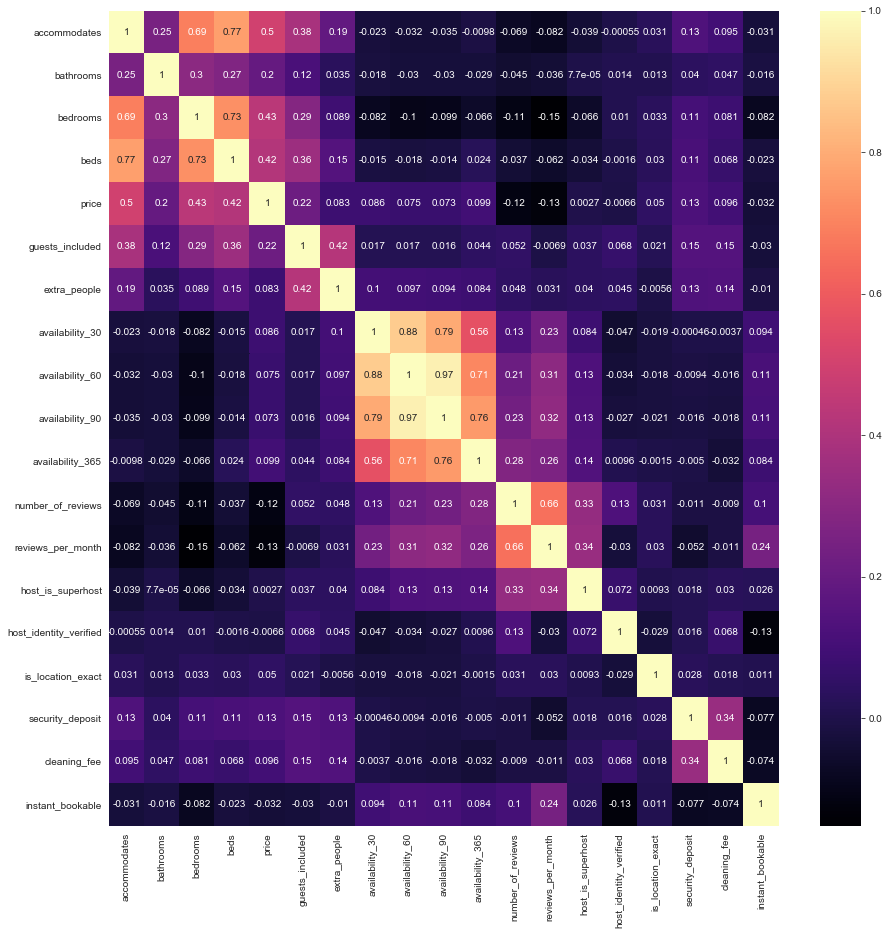

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df_predict.corr(),annot=True,cmap='magma')

## Modeling

In [21]:
def model_reg_all(x,y):
    from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
    from sklearn.linear_model import Lasso,Ridge,LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from xgboost import XGBRegressor
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.4)
    algo=[RandomForestRegressor,Lasso,Ridge,LinearRegression,GradientBoostingRegressor,XGBRegressor]
    model = []
    score=[]
    for item in algo:
        model.append(item())
    for item in model:
        item.fit(x_train,y_train)
        Prediction = item.predict(x_test)
        MAE = metrics.mean_absolute_error(Prediction,y_test)
        MSE = metrics.mean_squared_error(Prediction,y_test)
        RMSE = np.sqrt(metrics.mean_squared_error(Prediction,y_test))
        R2Score = metrics.r2_score(y_test,Prediction)
        temp=[MAE,MSE,RMSE,R2Score]
        score.append(temp)
    df = pd.DataFrame(score,columns=['MAE','MSE','RMSE','R2Score'],index=['RandomForestRegressor','Lasso','Ridge','LinearRegression','GradientBoostingRegressor','XGBRegressor'])
    return df 

In [22]:
def model_comparing(X,y,col_scaller):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    print('modeling')
    print(model_reg(X,y))

    scaler=StandardScaler()
    data_scaled = scaler.fit_transform(X[num_col])
    x_scaled_df=pd.DataFrame(data_scaled,columns=num_col)
    df_scaled =pd.concat([x_scaled_df,X.reset_index().drop(num_col,axis=1)],axis=1).drop('index',axis=1)

    print('\nmodeling with Standard scaler')
    print(model_reg(df_scaled,y.reset_index()['price']))
    print()

    x_PCA=PCA(n_components=20).fit_transform(X)
    pd.DataFrame(x_PCA,columns=['PC ' + str(i) for i in range(1,21)])

    print('\nmodeling with PCA')
    print(model_reg(x_PCA,y.reset_index()['price']))

    x_PCA=PCA(n_components=20).fit_transform(df_scaled)
    pd.DataFrame(x_PCA,columns=['PC ' + str(i) for i in range(1,21)])
    print('\nmodeling with Standard scaler and PCA')
    print(model_reg(x_PCA,y.reset_index()['price']))

In [23]:
df_X=pd.concat([pd.get_dummies(df_predict.drop(['name','amenities'],axis=1),drop_first=True),df_amin[list_amin]],axis=1)

y = df_X['price']
X = df_X.drop('price', axis=1)

print('modeling with one hot encoding')
print(model_reg_all(X,y))

from category_encoders import BinaryEncoder

binaryenc= BinaryEncoder(cols=['neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy'],drop_invariant=True)
x=binaryenc.fit_transform(df_predict).drop(['name','amenities'],axis=1)
df_X=pd.concat([x,df_amin],axis=1)

y = df_X['price']
X = df_X.drop('price', axis=1)

print('modeling with binary encoding')
print(model_reg_all(X,y))

catagory_col =df_predict.select_dtypes(include='O').drop(['name','amenities'],axis=1).columns
dflabel=df_predict.drop(catagory_col,axis=1)
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for item in catagory_col:
    dflabel[item]=LE.fit_transform(df_predict[item])
dflabel
df_X = pd.concat([dflabel.drop(['name','amenities'],axis=1),df_amin],axis=1)

y = df_X['price']
X = df_X.drop(['price'],axis=1)

print('modeling with Label encoding')
print(model_reg_all(X,y))

modeling with one hot encoding
[00:13:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                                 MAE          MSE       RMSE   R2Score
RandomForestRegressor      29.872023  1548.397889  39.349687  0.428826
Lasso                      31.200846  1629.501816  40.367088  0.398908
Ridge                      28.955119  1448.881950  38.064182  0.465535
LinearRegression           28.954086  1448.535324  38.059629  0.465663
GradientBoostingRegressor  28.594829  1406.841908  37.507891  0.481043
XGBRegressor               28.612726  1406.379591  37.501728  0.481213
modeling with binary encoding
[00:13:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                                 MAE          MSE       RMSE   R2Score
RandomForestRegressor      30.923447  1653.

In [24]:
df_to_pred=df_predict.drop(catagory_col,axis=1)
Labeling={}
for item in catagory_col:
    Labeling[item] = {}
    for i in range(len(df_predict.groupby(item).mean().price.sort_values(ascending=True).index)):
        Labeling[item][df_predict.groupby(item).mean().price.sort_values(ascending=True).index[i]]=i
    df_to_pred[item]=df_predict[item].map(Labeling[item])

df_X = pd.concat([df_to_pred.drop(['name','amenities'],axis=1),df_amin],axis=1)
y = df_X['price']
X = df_X.drop(['price'],axis=1)

print('modeling with Label encoding')
print(model_reg_all(X,y))

modeling with Label encoding
[00:13:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                                 MAE          MSE       RMSE   R2Score
RandomForestRegressor      29.774192  1542.869298  39.279375  0.430865
Lasso                      30.153369  1538.388509  39.222296  0.432518
Ridge                      29.468722  1489.819431  38.598179  0.450434
LinearRegression           29.468499  1489.821479  38.598206  0.450433
GradientBoostingRegressor  27.982551  1362.078935  36.906354  0.497555
XGBRegressor               27.934589  1357.411274  36.843063  0.499277


In [25]:
def model_reg(x,y):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from xgboost import XGBRegressor
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.4)
    algo=[GradientBoostingRegressor,XGBRegressor]
    model = []
    score=[]
    for item in algo:
        model.append(item())
    for item in model:
        item.fit(x_train,y_train)
        Prediction = item.predict(x_test)
        MAE = metrics.mean_absolute_error(Prediction,y_test)
        MSE = metrics.mean_squared_error(Prediction,y_test)
        RMSE = np.sqrt(metrics.mean_squared_error(Prediction,y_test))
        R2Score = metrics.r2_score(y_test,Prediction)
        temp=[MAE,MSE,RMSE,R2Score]
        score.append(temp)
    df = pd.DataFrame(score,columns=['MAE','MSE','RMSE','R2Score'],index=['GradientBoostingRegressor','XGBRegressor'])
    return df 
df_to_pred=df_predict.drop(catagory_col,axis=1)
Labeling={}
for item in catagory_col:
    Labeling[item] = {}
    for i in range(len(df_predict.groupby(item).mean().price.sort_values(ascending=True).index)):
        Labeling[item][df_predict.groupby(item).mean().price.sort_values(ascending=True).index[i]]=i
    df_to_pred[item]=df_predict[item].map(Labeling[item])

df_X = pd.concat([df_to_pred.drop(['name','amenities'],axis=1),df_amin],axis=1)
y = df_X['price']
X = df_X.drop(['price'],axis=1)
num_col=['accommodates', 'bathrooms', 'bedrooms', 'beds','guests_included', 'availability_30', 'availability_60','availability_90', 'availability_365']

print(model_comparing(X,y,num_col))


modeling
[00:13:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                                 MAE          MSE       RMSE   R2Score
GradientBoostingRegressor  27.981916  1361.984645  36.905076  0.497590
XGBRegressor               27.934589  1357.411274  36.843063  0.499277

modeling with Standard scaler
[00:14:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                                 MAE          MSE       RMSE   R2Score
GradientBoostingRegressor  27.982676  1362.035462  36.905765  0.497571
XGBRegressor               27.934589  1357.411274  36.843063  0.499277


modeling with PCA
[00:14:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                      

### beradasarkan uji coba diatas akan di gunakan GradientBoostingRegressor dgn encoding yang digunakan adalah Label Encoding

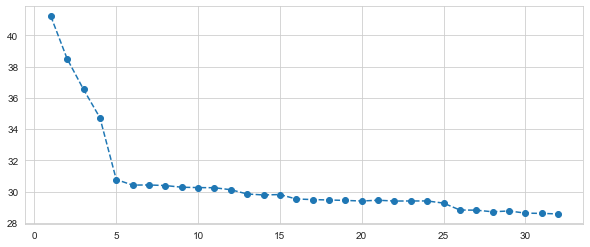

n_component terbaik di 32 dengan mean 28.56768464335342


N   CV Score
31  32  28.567685
30  31  28.599711
29  30  28.618903
27  28  28.704775
28  29  28.757079

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor


num_col=['accommodates', 'bathrooms', 'bedrooms', 'beds','guests_included', 'availability_30', 'availability_60','availability_90', 'availability_365']
scaler=StandardScaler()
data_scaled = scaler.fit_transform(X[num_col])
x_scaled_df=pd.DataFrame(data_scaled,columns=num_col)
df_scaled =pd.concat([x_scaled_df,X.reset_index().drop(num_col,axis=1)],axis=1).drop('index',axis=1)

cv_scores=[]
N=[]
for i in range(1,33):
    XPCA = PCA(n_components=i).fit_transform(df_scaled)
    x_train,x_test,y_train,y_test = train_test_split(XPCA,y.reset_index(drop=True),random_state=101,test_size=0.4)
    model=GradientBoostingRegressor()
    model.fit(x_train,y_train)
    Prediction = model.predict(x_test)
    MAE = metrics.mean_absolute_error(Prediction,y_test)
    cv_scores.append(MAE)
    N.append(i)
    
plt.figure(figsize=(10,4))
plt.plot(N,cv_scores,linestyle='dashed',marker='o')
plt.show()
NPCA=pd.DataFrame({'N':N,'CV Score':cv_scores}).sort_values(by=['CV Score'],ascending=True)
print('n_component terbaik di '+str(NPCA['N'].iloc[0])+' dengan mean ' +str(NPCA['CV Score'].iloc[0]))
NPCA.head()

### model 2

In [53]:
df_predict2.corr()['price'].sort_values()

new_Indoorfireplace            0.118095
bathrooms                      0.120554
new_Laptopfriendlyworkspace    0.122433
new_Kitchen                    0.124113
security_deposit               0.139051
new_Hottub                     0.147293
new_baby_friendly              0.148791
new_Iron                       0.159413
guests_included                0.201720
new_family                     0.208432
new_TV                         0.225424
beds                           0.355592
bedrooms                       0.363045
accommodates                   0.430613
price                          1.000000
Name: price, dtype: float64

In [52]:
df_predict2=df_predict[['neighbourhood_cleansed','accommodates','property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'security_deposit','cancellation_policy']]
df_predict2 = pd.concat([df_predict2,df_amin],axis=1)
df_predict2 = df_predict2[(df_predict2['price']<220) & (df_predict2['price']>20)].drop(['new_Hairdryer'],axis=1)


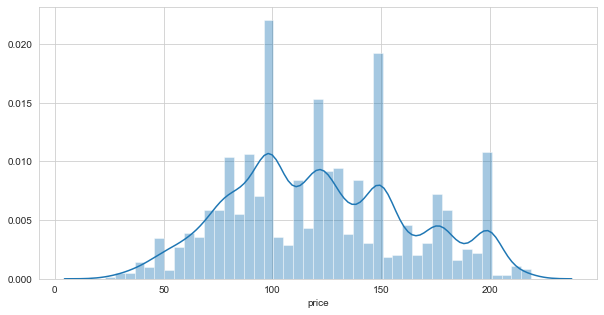

In [36]:
plt.figure(figsize=(10, 5))
sns.distplot(df_predict2['price'])

[00:37:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


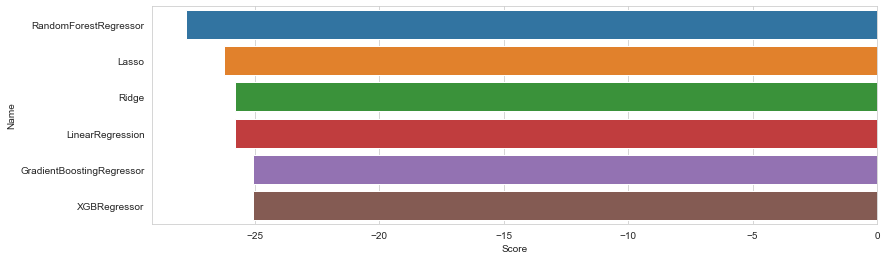

In [54]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

catagory_col =df_predict2.select_dtypes(include='O').columns
df_to_pred2=df_predict2.drop(catagory_col,axis=1)
Labeling={}
for item in catagory_col:
    Labeling[item] = {}
    for i in range(len(df_predict2.groupby(item).mean().price.sort_values(ascending=True).index)):
        Labeling[item][df_predict2.groupby(item).mean().price.sort_values(ascending=True).index[i]]=i
    df_to_pred2[item]=df_predict2[item].map(Labeling[item])

y = df_to_pred2['price']
X = df_to_pred2.drop(['price'],axis=1)

# y = df_X['price']
# X = df_X.drop(['price'],axis=1)
Scoring_CV=[]
for item in [RandomForestRegressor,Lasso,Ridge,LinearRegression,GradientBoostingRegressor,XGBRegressor]:
    a=cross_val_score(item(),X,y,cv=5,scoring='neg_mean_absolute_error')
    Scoring_CV.append(a.mean())
score_cv_df = (pd.DataFrame({'Score' : Scoring_CV,'Name' :['RandomForestRegressor','Lasso','Ridge','LinearRegression','GradientBoostingRegressor','XGBRegressor']}).sort_values(by=['Score'],ascending=True))
plt.figure(figsize=(13,4))
sns.barplot(y=score_cv_df['Name'],x=score_cv_df['Score'])

In [55]:
def regression_model(x,y,n_cv):
    from xgboost import XGBRegressor
    from sklearn.model_selection import KFold 
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    list_score = []
    num=1
    iterasi=[]
    model_name = ['GradientBoostingRegressor','XGBR']
    models = [GradientBoostingRegressor,XGBRegressor]
    kf = KFold(n_splits=n_cv,shuffle=True)
    for train_index , test_index in kf.split(x,y):
        X_train,X_test,y_train,y_test = x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        metrics = {}
        for i,item in enumerate(models):
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            metrics[model_name[i]] = round(mean_absolute_error(y_test,prediction),2)
        list_score.append(metrics)
        iterasi.append('iteration ke {}'.format(num))
        num+=1
    list_score
    dfreport = pd.DataFrame(list_score,index=iterasi)
    dfreport.loc['average'] = dfreport.mean()
    return dfreport

regression_model(X,y,5)

[00:37:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GradientBoostingRegressor    XGBR
iteration ke 1                     24.990  24.950
iteration ke 2                     24.920  24.900
iteration ke 3                     24.720  24.700
iteration ke 4                     24.660  24.660
iteration ke 5                     25.040  25.060
average                            24.866  24.854

In [56]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[1,3,5],'n_estimators' : [10,50,100],'learning_rate':[.3, .2, .1],
         'min_samples_leaf':[1,3,5,7], 'min_samples_split':[2,3,5,7]}
gsc = GridSearchCV(GradientBoostingRegressor(),param,cv=3)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.4)
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf= 7, min_samples_split= 7,n_estimators= 100)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
MAE = metrics.mean_absolute_error(prediction,y_test)
r2=metrics.r2_score(y_test,prediction)
print('didapat mae =' + str(MAE)+ ' dan R2 Score '+ str(r2))

didapat mae =24.46041124618668 dan R2 Score 0.4225684438570333


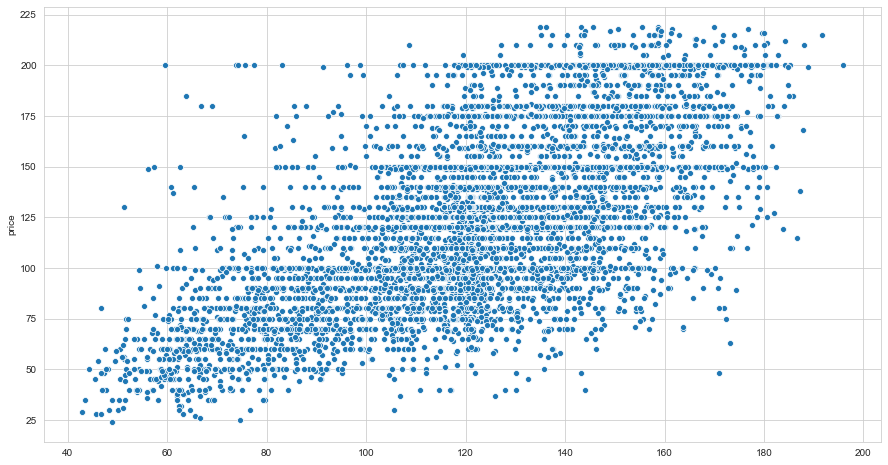

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction,y_test)


In [61]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = (df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['abs Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction.sort_values(['abs Selisih'],ascending=False)


y_true      y_pred     Selisih  abs Selisih
10089     200   59.617115  140.382885   140.382885
12776     200   73.849743  126.150257   126.150257
16327     200   74.274197  125.725803   125.725803
4821      200   75.628430  124.371570   124.371570
2118       48  170.876703 -122.876703   122.876703
18590     200   77.413743  122.586257   122.586257
3082      185   63.821872  121.178128   121.178128
5632      200   83.131723  116.868277   116.868277
11149     180   66.879815  113.120185   113.120185
10355     180   68.933014  111.066986   111.066986
15305      63  173.171734 -110.171734   110.171734
11480     199   91.327168  107.672832   107.672832
5501       40  144.033244 -104.033244   104.033244
18434     200   96.251045  103.748955   103.748955
16502     210  108.704371  101.295629   101.295629
13472     200   98.763710  101.236290   101.236290
13562     195   96.845256   98.154744    98.154744
15303      75  172.364393  -97.364393    97.364393
8642      195   99.344544   95.655456    95.655456
9711       48  143.182667  -95.182667    95.182667
18234     180   85.479864   94.520136    94.520136
15307      70  163.642511  -93.642511    93.642511
17215     200  106.847952   93.152048    93.152048
11589     200  106.883455   93.116545    93.116545
10631     175   81.939584   93.060416    93.060416
16559     149   56.139055   92.860945    92.860945
15003     150   57.348597   92.651403    92.651403
15309      71  163.642511  -92.642511    92.642511
13569     200  107.468013   92.531987    92.531987
6005      180   87.862490   92.137510    92.137510
19450      80  172.050128  -92.050128    92.050128
889        80  170.853558  -90.853558    90.853558
16983     200  109.350076   90.649924    90.649924
9895       40  130.128944  -90.128944    90.128944
16261     165   75.427710   89.572290    89.572290
17139     175   85.884390   89.115610    89.115610
7277       37  126.000668  -89.000668    89.000668
13805     195  106.201587   88.798413    88.798413
3030      200  111.922007   88.077993    88.077993
3279       40  127.859753  -87.859753    87.859753
16976     150   62.495894   87.504106    87.504106
10591      45  132.474981  -87.474981    87.474981
19692      70  156.855043  -86.855043    86.855043
10511      60  146.271054  -86.271054    86.271054
14062     170   84.099411   85.900589    85.900589
15816      50  135.696424  -85.696424    85.696424
16059     205  119.389520   85.610480    85.610480
19496     180   94.389649   85.610351    85.610351
83         89  174.344474  -85.344474    85.344474
17237     219  134.870637   84.129363    84.129363
9819      200  115.930164   84.069836    84.069836
16164     177   93.326931   83.673069    83.673069
16828      71  154.112370  -83.112370    83.112370
15124     210  127.031818   82.968182    82.968182
9178      195  112.225629   82.774371    82.774371
12101     219  136.242112   82.757888    82.757888
18828     195  112.257106   82.742894    82.742894
15601     175   92.295816   82.704184    82.704184
11757      75  157.501110  -82.501110    82.501110
5312      200  117.752807   82.247193    82.247193
15323      48  130.141260  -82.141260    82.141260
5258      200  118.020359   81.979641    81.979641
4374      200  118.602209   81.397791    81.397791
846        58  139.064662  -81.064662    81.064662
19735     176   94.937547   81.062453    81.062453
7854       65  146.048055  -81.048055    81.048055
78         74  154.999270  -80.999270    80.999270
12286      57  137.967857  -80.967857    80.967857
14874     195  114.052544   80.947456    80.947456
5606       90  170.827306  -80.827306    80.827306
8964       85  165.823804  -80.823804    80.823804
14414     200  119.349692   80.650308    80.650308
1483       75  155.643742  -80.643742    80.643742
12038     199  118.503776   80.496224    80.496224
6173       56  136.479666  -80.479666    80.479666
19574     185  104.561050   80.438950    80.438950
18564     200  119.917058   80.082942    80.082942
17091     215  135.097415   7

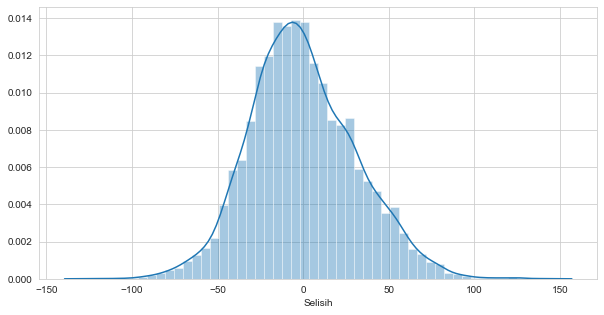

In [62]:
plt.figure(figsize=(10, 5))
sns.distplot(df_prediction['Selisih'])

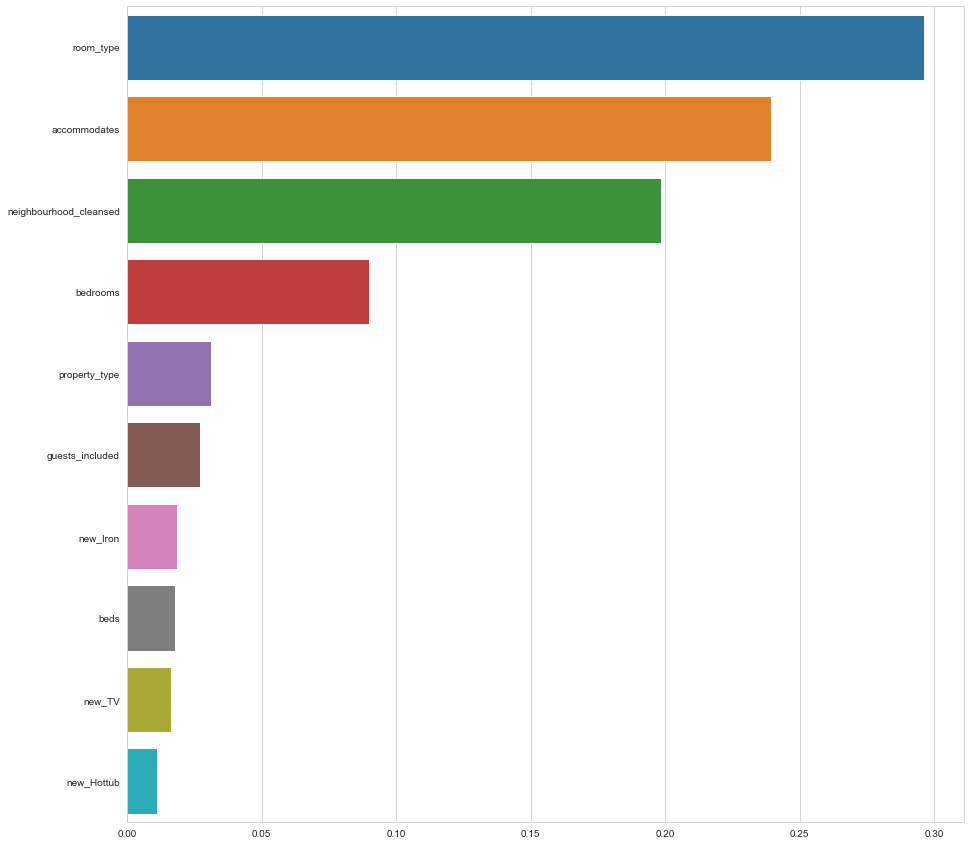

In [63]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

In [64]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
filename = 'x_colomn.sav'
pickle.dump(X.columns, open(filename , 'wb'))
df_predict2.to_csv('clean.csv',index=False)

In [66]:
X.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'security_deposit', 'new_Kitchen', 'new_Laptopfriendlyworkspace',
       'new_Indoorfireplace', 'new_Hottub', 'new_baby_friendly', 'new_Iron',
       'new_TV', 'new_family', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'cancellation_policy'],
      dtype='object')

In [70]:
new_df=df_clean[['name','neighbourhood_cleansed','accommodates','property_type','room_type','bathrooms','bedrooms','beds','price','latitude','longitude']]
new_df.to_csv('clean_df.csv',index=False)

In [72]:
new_df

name  \
0               Quiet Garden View Room & Super Fast WiFi   
1                      Quiet apt near center, great view   
2             100%Centre-Studio 1 Private Floor/Bathroom   
3                    Lovely apt in City Centre (Jordaan)   
4      Romantic, stylish B&B houseboat in canal district   
5                    Cosy guest room near city centre -1   
6                                Comfortable double room   
7                                Comfortable single room   
8                    2-story apartment + rooftop terrace   
9                      Amsterdam Center Entire Apartment   
10           Comfortable room@PERFECT location + 2 bikes   
11     View into park / museum district (long/short s...   
12                         Luxury design with canal view   
13                    Amsterdam Centre, 3-room Apartment   
14                     Cozy Flat in the Jordaan (center)   
15                        Cozy loft in central Amsterdam   
16                      Charming apartment in old centre   
18                     Luxurous Houseboat-Great Location   
19            Family Home (No drugs, smoking or parties)   
20                   Perfect central Amsterdam apartment   
21                    B & B de 9 Straatjes (city center)   
22                   Bright Apartment - residential area   
23                                        Amsterdam Aqua   
24              Green studio at the attic of a townhouse   
25              Nice room near centre with en suite bath   
26       Large quiet Studio with gardenview in hip area.   
27                                 Luminous centric room   
28                      groundfloor apartment with patio   
29                       Bright Loft in Centre Amsterdam   
30                      Greatly located, cozy atmosphere   
31                   Apartment near Museumplein (centre)   
32                      86 m2, city centre & lovely view   
33                  Very Bright & Spacious Apt + 4 Bikes   
34                        Still cosy X Mas availability!   
35     En Suite accommodation in a monumental canal h...   
36                   Charming, beautifully & sunny place   
38                                      Luxury Houseboat   
40                                              Juwelier   
41                     Amsterdam - The Pijp Apartment 1A   
42                                  Rebel / Private Room   
43                             Yves Klein / Private Room   
44                  Cozy Studio || Located at the canal!   
45                   Centre Museum Quarter Apt Roof Deck   
46                     B28 Unique Houseboat  Herengracht   
47     Dutch designer canal house apartment (city cen...   
48     Garden Suite Studiohttps://www.airbnb.com/mana...   
49                      Cottage Room- Completely Private   
50                       studio INN, bright and spacious   
51                    Amazing location - canalhouse room   
52                    TOP LOCATED Canalhouse B&B Jordaan   
53                   The Backroom - Central private appt   
54                       Bright apt in central Amsterdam   
55                 Single attic room for one person only   
56                   Bed&Bike SleepOnNature - free bikes   
57                   Houseboat "Ramona" Amsterdam centre   
58                     De Baronie B&B in historic centre   
59                           Beautiful and spacious room   
60             Sunny, spacious apartment near Vondelpark   
61                        A'dam Centre, Bright and Comfy   
62                                     museums and music   
63                                 Amsterdam at its best   
64          Jardin Dreams | Warm | 2 Bedrooms|Renovated|   
65              all private, art @ home in city center-1   
66              Lovely self contained studio in Oud West   
67                                Retro Luxury Apartment   
68                       Bohemian apartment in nice area   
69          Large private room f

df_clean.groupby(['availability_365']).mean()['price']
            

from sklearn.model_selection import GridSearchCV
param = {'max_depth':[1,3,5],'n_estimators' : [10,50,100],'learning_rate':[.3, .2, .1],
         'min_samples_leaf':[1,3,5,7], 'min_samples_split':[2,3,5,7]}
gsc = GridSearchCV(GradientBoostingRegressor(),param,cv=3)
grid_result = gsc.fit(X.drop(['availability_365'],axis=1), y)

print("Best parameters : %s" % grid_result.best_params_)

x_train,x_test,y_train,y_test = train_test_split(X.drop(['availability_365'],axis=1),y,random_state=101,test_size=0.4)
model=GradientBoostingRegressor(learning_rate=0.2,max_depth=3,min_samples_leaf= 1, min_samples_split= 2,n_estimators= 100)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
MAE = metrics.mean_absolute_error(prediction,y_test)
r2=metrics.r2_score(y_test,prediction)
print('didapat mae =' + str(MAE)+ ' dan R2 Score '+ str(r2))